# AI-Image-Detector

In [1]:
import pandas as pd
import numpy as np
import os

import matplotlib.pyplot as plt
import cv2

## Data Structure

In [2]:
base_dir = './dataset/'

train_df = pd.read_csv(os.path.join(base_dir, 'train.csv'))
test_df = pd.read_csv(os.path.join(base_dir, 'test.csv'))

In [3]:
print("train_df shape: ", train_df.shape)
print(train_df.head())

train_df shape:  (79950, 3)
   Unnamed: 0                                        file_name  label
0           0  train_data/a6dcb93f596a43249135678dfcfc17ea.jpg      1
1           1  train_data/041be3153810433ab146bc97d5af505c.jpg      0
2           2  train_data/615df26ce9494e5db2f70e57ce7a3a4f.jpg      1
3           3  train_data/8542fe161d9147be8e835e50c0de39cd.jpg      0
4           4  train_data/5d81fa12bc3b4cea8c94a6700a477cf2.jpg      1


In [4]:
print("test_df shape: ", test_df.shape)
print(test_df.head())

test_df shape:  (5540, 1)
                                                  id
0  test_data_v2/1a2d9fd3e21b4266aea1f66b30aed157.jpg
1  test_data_v2/ab5df8f441fe4fbf9dc9c6baae699dc7.jpg
2  test_data_v2/eb364dd2dfe34feda0e52466b7ce7956.jpg
3  test_data_v2/f76c2580e9644d85a741a42c6f6b39c0.jpg
4  test_data_v2/a16495c578b7494683805484ca27cf9f.jpg


In [5]:
# for consistency with the train data
test_df = test_df.rename(columns={'id': 'file_name'})
train_df = train_df.drop(columns=['Unnamed: 0'])

### Modify Image Path

In [6]:
def modify_image_path(df):
    # Modify the file_name to have the full path
    df['file_name'] = df['file_name'].apply(lambda x: os.path.join(base_dir, x))
    return df


train_df = modify_image_path(train_df)
test_df = modify_image_path(test_df)

print(train_df.head())
print(test_df.head())

                                           file_name  label
0  ./dataset/train_data/a6dcb93f596a43249135678df...      1
1  ./dataset/train_data/041be3153810433ab146bc97d...      0
2  ./dataset/train_data/615df26ce9494e5db2f70e57c...      1
3  ./dataset/train_data/8542fe161d9147be8e835e50c...      0
4  ./dataset/train_data/5d81fa12bc3b4cea8c94a6700...      1
                                           file_name
0  ./dataset/test_data_v2/1a2d9fd3e21b4266aea1f66...
1  ./dataset/test_data_v2/ab5df8f441fe4fbf9dc9c6b...
2  ./dataset/test_data_v2/eb364dd2dfe34feda0e5246...
3  ./dataset/test_data_v2/f76c2580e9644d85a741a42...
4  ./dataset/test_data_v2/a16495c578b749468380548...


### Show Sample Images

function taken from https://www.kaggle.com/code/sheemamasood/ai-vs-human-convnextnswintranformers-techpulse

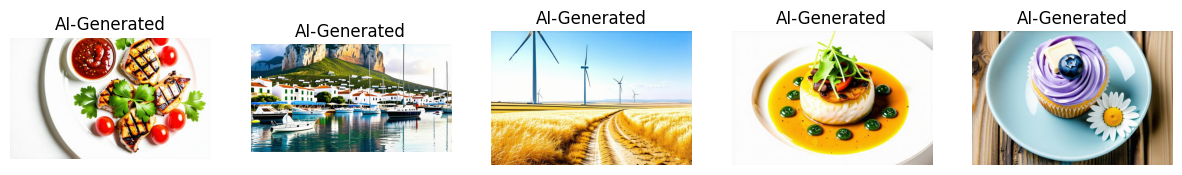

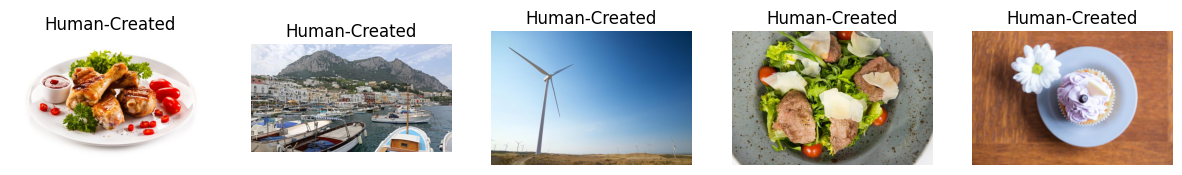

In [7]:
def show_images(df, label, num_images=5):
    sample_images = df[df["label"] == label].sample(num_images, random_state=42)["file_name"].values

    plt.figure(figsize=(15, 5))
    for i, img_path in enumerate(sample_images):
        img = cv2.imread(img_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        plt.subplot(1, num_images, i+1)
        plt.imshow(img)
        plt.axis("off")
        plt.title("AI-Generated" if label == 1 else "Human-Created")
        
    plt.show()

# Show AI-Generated Images
show_images(train_df, label=1)

# Show Human-Created Images
show_images(train_df, label=0)

## Exploratory Data Analysis

### Checking for Missing and Duplicate Values

In [8]:
print("Checking for missing values in the dataset:\n")

print("Train Data:\n", train_df.isnull().sum())
print("Test Data:\n", test_df.isnull().sum())

print("Checking for duplicates:")

print("Train Data: ", train_df.duplicated().sum())
print("Test Data: ", test_df.duplicated().sum())


Checking for missing values in the dataset:

Train Data:
 file_name    0
label        0
dtype: int64
Test Data:
 file_name    0
dtype: int64
Checking for duplicates:
Train Data:  0
Test Data:  0


In [9]:
print("Checking the distribution of the labels in the train data:")

print(train_df["label"].value_counts())

Checking the distribution of the labels in the train data:
label
1    39975
0    39975
Name: count, dtype: int64


### Class Distribution

We can observe that the distrubition of target label is even. This is expected because the dataset has paired sets of Human and AI generated images.

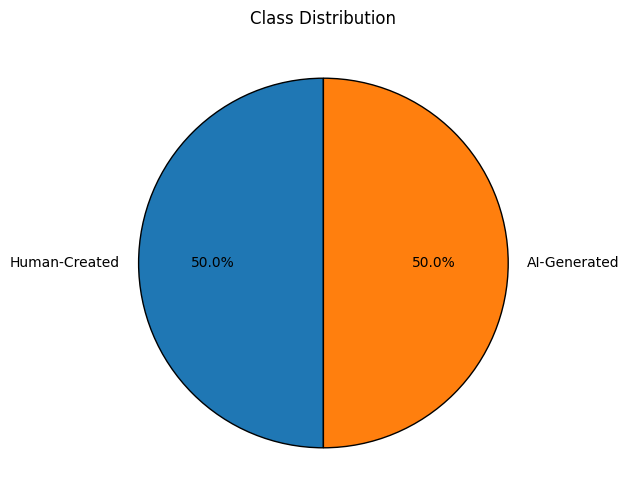

In [10]:
# Plot class distribution
def plot_class_distribution(df):    
    plt.figure(figsize=(6, 6))
    plt.pie(df["label"].value_counts(), labels=['Human-Created', 'AI-Generated'], autopct='%1.1f%%', startangle=90, wedgeprops={'edgecolor': 'black'})
    plt.title('Class Distribution')
    plt.show()
    

plot_class_distribution(train_df)


### Image Dimensions Distribution

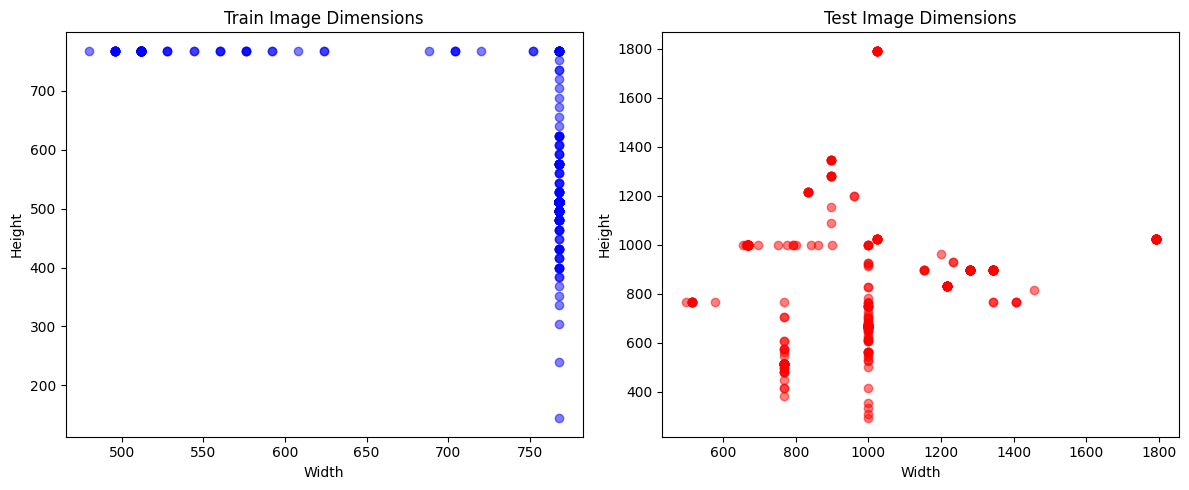

In [11]:
# Helper function for getting image dimensions
def get_image_dimension(image_path, sample_size=500):
    image_dimensions = []
    
    image_paths = image_path.sample(sample_size, random_state=42)

    for image_path in image_paths:
        img = cv2.imread(image_path)
        h, w, _ = img.shape
        image_dimensions.append((w, h))
    
    return pd.DataFrame(image_dimensions, columns=['width', 'height'])

# Plot train and test image dimensions
def plot_train_test_image_dimension(train_df, test_df, sample_size=500):
    train_image_dimensions = get_image_dimension(train_df['file_name'])
    test_image_dimensions = get_image_dimension(test_df['file_name'])
    
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))
    
    axes[0].scatter(train_image_dimensions['width'], train_image_dimensions['height'], alpha=0.5, c='blue', marker='o')
    axes[0].set_xlabel('Width')
    axes[0].set_ylabel('Height')
    axes[0].set_title('Train Image Dimensions')

    axes[1].scatter(test_image_dimensions['width'], test_image_dimensions['height'], alpha=0.5, c='red', marker='o')
    axes[1].set_xlabel('Width')
    axes[1].set_ylabel('Height')
    axes[1].set_title('Test Image Dimensions')

    plt.tight_layout()
    plt.show()

plot_train_test_image_dimension(train_df, test_df)

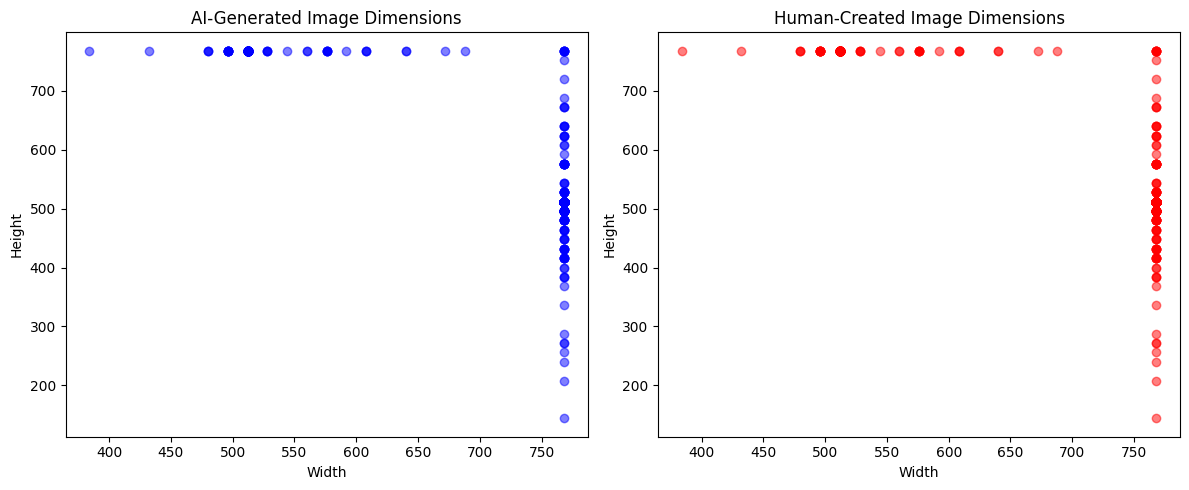

In [12]:
# Plot AI-Generated and Human-Created image dimensions in the training dataset
def plot_ai_human_image_dimension(df, sample_size=500):
    ai_image_dimensions = get_image_dimension(df[df['label'] == 1]['file_name'], sample_size)
    human_image_dimensions = get_image_dimension(df[df['label'] == 0]['file_name'], sample_size)
    
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))
    
    axes[0].scatter(ai_image_dimensions['width'], ai_image_dimensions['height'], alpha=0.5, c='blue', marker='o')
    axes[0].set_xlabel('Width')
    axes[0].set_ylabel('Height')
    axes[0].set_title('AI-Generated Image Dimensions')

    axes[1].scatter(human_image_dimensions['width'], human_image_dimensions['height'], alpha=0.5, c='red', marker='o')
    axes[1].set_xlabel('Width')
    axes[1].set_ylabel('Height')
    axes[1].set_title('Human-Created Image Dimensions')

    plt.tight_layout()
    plt.show()

plot_ai_human_image_dimension(train_df)

In [13]:
# Quick check to see if the image dimensions are the same for AI-Generated and Human-Created images
ai_image_dimensions = get_image_dimension(train_df[train_df['label'] == 1]['file_name'], 39975)
human_image_dimensions = get_image_dimension(train_df[train_df['label'] == 0]['file_name'], 39975)

print((ai_image_dimensions['width'] == human_image_dimensions['width']).sum())
print((ai_image_dimensions['height'] == human_image_dimensions['height']).sum())

39975
39975


## Training Prep

In [21]:
import torch
import torchvision.transforms as transforms
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split

In [22]:
train_df, val_df = train_test_split(train_df, test_size=0.2, random_state=42, stratify=train_df['label'])

print(f"Train Data Shape: {train_df.shape}")
print(f"Validation Data Shape: {val_df.shape}")
print(f"Test Data Shape: {test_df.shape}")

Train Data Shape: (51168, 2)
Validation Data Shape: (12792, 2)
Test Data Shape: (5540, 1)


### Data Augmentation

In [23]:
transform_train = transforms.Compose([
    transforms.Resize((224)),                
    # transforms.RandomResizedCrop(224),  
    transforms.RandomHorizontalFlip(),      
    # transforms.RandomRotation(10),           
    # transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.1),
    # transforms.RandAugment(num_ops=2, magnitude=9)  
    transforms.ToTensor(),        
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])  
])                        

transform_val = transforms.Compose([
    transforms.Resize(224),            
    transforms.ToTensor(),                        
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])   
])

### Custom Dataset

In [24]:
class CustomDataset(Dataset):
    def __init__(self, df, is_train=True, transform=None):
        self.df = df
        self.transform = transform
        self.is_train = is_train
    
    def __len__(self):
        return len(self.df)
    
    def __getitem__(self, idx):
        img_path = self.df.iloc[idx]['file_name']
        image = cv2.imread(img_path)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

        if self.transform:
            image = self.transform(image)
        
        if self.is_train:
            label = self.df.iloc[idx]['label']
            return image, label
        else:
            return image

### Configuration

In [25]:
CONFIG = {
        "model": "ResNet50",   # Change name when using a different model
        "batch_size": 8, # run batch size finder to find optimal batch size
        "learning_rate": 3e-4,
        "epochs": 10,
        "num_workers": 4, # Adjust based on your system
        "device": "mps" if torch.backends.mps.is_available() else "cuda" if torch.cuda.is_available() else "cpu",
        "wandb_project": "ai-human-image-classification",
        "seed": 42,
    }

In [26]:
trainset = CustomDataset(train_df, is_train=True, transform=transform_train)
trainloader = DataLoader(train_df, batch_size=CONFIG["batch_size"], shuffle=True, num_workers=CONFIG["num_workers"])

valset = CustomDataset(val_df, is_train=True, transform=transform_val)
valloader = DataLoader(val_df, batch_size=CONFIG["batch_size"], shuffle=False, num_workers=CONFIG["num_workers"])

print(f"Train dataset size: {len(trainset)}")
print(f"Validation dataset size: {len(valset)}")

Train dataset size: 51168
Validation dataset size: 12792


## CNN-based Models

In [ ]:
from torchvision.models import resnet50, ResNet50_Weights, resnext50_32x4d, ResNeXt50_32X4D_Weights

### ResNet